In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

pine = pd.read_table("pine.txt", delim_whitespace = True)

In [4]:
pine.head()

,y,x,z
0,3040,29.2,25.4
1,2470,24.7,22.2
2,3610,32.3,32.2
3,3480,31.3,31.0
4,3810,31.5,30.9


Table 1 replication

In [6]:
# model 1 marginal likelihood
from scipy.stats import invgamma
from scipy.stats import norm
cs = [2, 3, 5, 7, 10]
ns = [10, 20, 40, 60, 80, 100]
mu_alpha = 3000
sigma_alpha = 10**6
mu_beta = 185
sigma_beta = 10**4
a = 3
b = 1/(2*300**2)

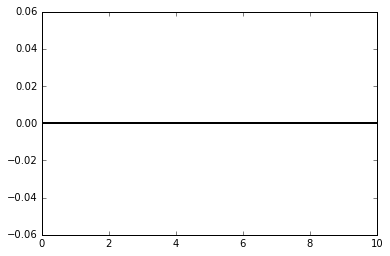

In [11]:
# お試し
x = np.linspace(0,10,200)
rv = invgamma(a, scale = 1/b)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [21]:
p = pine.values
ave_x = np.average(p[:, 1])
ave_x

27.859523809523814

In [25]:
np.shape(p)[0]

42

In [31]:
def sum1(beta):
    elements = np.ones(np.shape(p)[0])
    for i in range(np.shape(p)[0]):
        elements[i] = p[i, 0] - beta * (p[i, 1] - ave_x)
    return sum(elements)

def sum2(alpha):
    elements = np.ones(np.shape(p)[0])
    for i in range(np.shape(p)[0]):
        elements[i] = (p[i, 1] - ave_x)*(p[i, 0] - alpha)
    return sum(elements)

def sum3(alpha, beta):
    elements = np.ones(np.shape(p)[0])
    for i in range(np.shape(p)[0]):
        elements[i] = (p[i, 0] - alpha - beta*(p[i, 1] - ave_x))**2
    return sum(elements)

def loglike(alpha, beta, sigma):
    return N*np.log(1/(sigma*np.sqrt(2*np.pi))) - sum3(alpha, beta) / (2*sigma)

In [39]:
np.log(2)

0.69314718055994529

In [ ]:
# serial MCMC

from scipy.stats import invgamma
from scipy.stats import norm

cs = [2, 3, 5, 7, 10]
ns = [10, 20, 40, 60, 80, 100]
mu_alpha = 3000
sigma_alpha = 10**6
mu_beta = 185
sigma_beta = 10**4
a = 3
b = 1/(2*300**2)

p = pine.values
ave_x = np.average(p[:, 1])

alphas = [3000]
betas = [185]
sigmas = [90000]

main_iter = 100
sample_iter = 100000
burn_in = 30000

N = np.shape(p)[0]
var = np.var(p[:, 1])

for i in range(n+1):
    t = (i/n)**c
    
    for j in range(sample_iter):
        
        location_alpha = (sigma_alpha*t*sum1(betas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + sigmas[-1])
        scale_alpha = np.sqrt((sigma_alpha * sigmas[-1]) / (sigma_alpha * N*t + sigmas[-1]))
        alphas.append(norm.rvs(loc = location_alpha, scale = scale_alpha))
        
        location_beta = (sigma_beta * t * sum2(alphas[-1]) + sigmas[-1] * mu_beta) / (sigma_beta * var*N + sigmas[-1])
        scale_beta = (sigmas[-1] * sigma_beta) / (sigma_beta * var*N + sigmas[-1])
        betas.append(norm.rvs(loc = location_beta, scale = scale_beta))
        
        shape = N*t/2 + a
        invrate = 2*b / (b*t*sum3(alphas[-1], betas[-1]) + 2)
        sigmas.append(invgamma(a = shape, scale = 1/ invrate))
    
    alpha_sample = alphas[burn_in:]
    beta_sample = betas[burn_in:len(betas) -1]
    sigma_sample = sigmas[burn_in:len(sigmas) -1]
    
    box = np.ones(len(alpha_sample))
    for k, l in enumerate(alpha_sample):
        box[k] = loglike(l, beta_sample[k], sigma_sample[k])
    est = np.average(box)
    
    

In [37]:
l = [0,1,2]
l[1:]

[1, 2]